In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df.shape

(381109, 12)

In [7]:
# checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [10]:
# checking distribution for target column
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

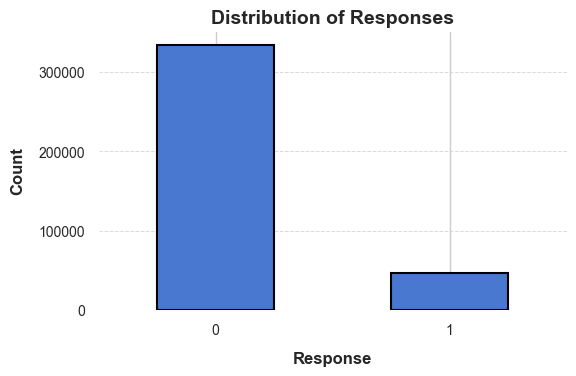

In [12]:
# Set Seaborn style for aesthetics
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Customize the color palette
palette = sns.color_palette("muted")

plt.figure(figsize=(6, 4))  # Adjust size for better presentation

# Create the bar plot with Seaborn
value_counts.plot(
    kind='bar', 
    color=palette[0],  # Use a muted color for elegance
    edgecolor='black',  # Add edge for better separation
    linewidth=1.5
)

# Customize the labels and title
plt.xlabel('Response', fontsize=12, labelpad=10, fontweight='bold')  # Add padding for clarity
plt.ylabel('Count', fontsize=12, labelpad=10, fontweight='bold')
plt.title('Distribution of Responses', fontsize=14, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=10, rotation=0, fontweight='medium')  # Ensure x-ticks are readable
plt.yticks(fontsize=10, fontweight='medium')

# Remove spines for a clean look
sns.despine(left=True, bottom=True)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

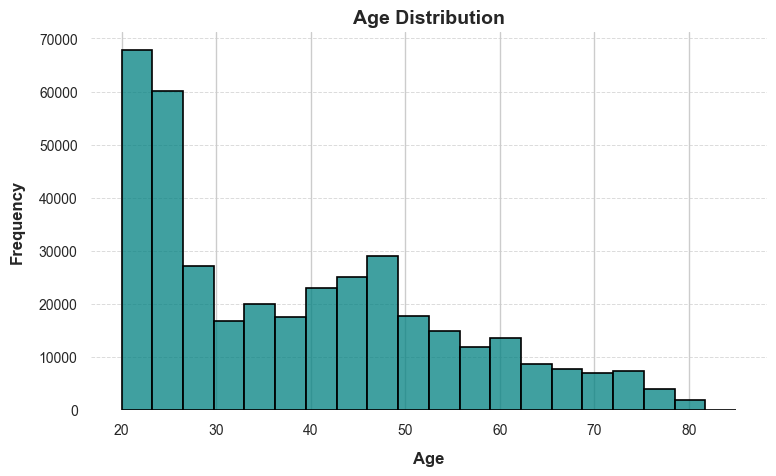

In [14]:
# Set Seaborn style for aesthetics
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Define figure size
plt.figure(figsize=(8, 5))  # Adjust size for better presentation

# Create the histogram
sns.histplot(
    df['Age'], 
    bins=20, 
    kde=False,  # Add kde=True for density curve if desired
    color="teal",  # Choose an elegant color
    edgecolor="black",  # Add edges for better distinction
    linewidth=1.2
)

# Customize labels and title
plt.xlabel('Age', fontsize=12, labelpad=10, fontweight='bold')  # Add padding for clarity
plt.ylabel('Frequency', fontsize=12, labelpad=10, fontweight='bold')
plt.title('Age Distribution', fontsize=14, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=10, fontweight='medium')
plt.yticks(fontsize=10, fontweight='medium')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Remove top and right spines
sns.despine(left=True, bottom=True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

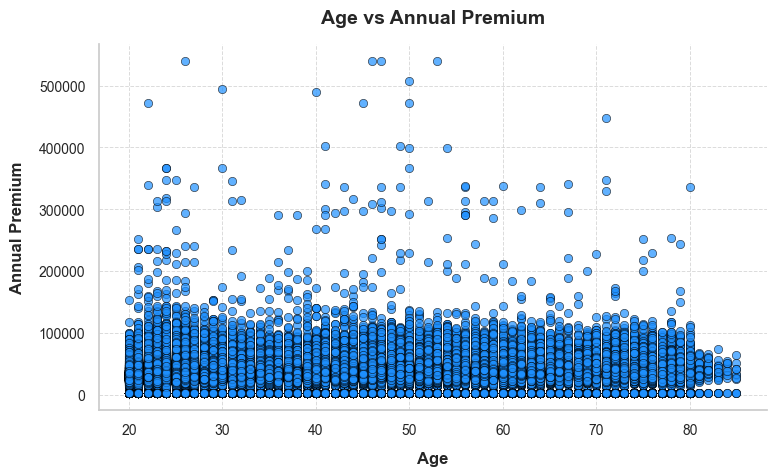

In [15]:
# Set Seaborn style for aesthetics
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Define figure size
plt.figure(figsize=(8, 5))  # Adjust the size for better visibility

# Create the scatter plot
sns.scatterplot(
    x='Age', 
    y='Annual_Premium', 
    data=df, 
    color='dodgerblue',  # Use a vibrant yet professional color
    edgecolor='black',  # Add edges to the markers
    linewidth=0.5, 
    alpha=0.7  # Slight transparency for overlapping points
)

# Customize the title and labels
plt.title('Age vs Annual Premium', fontsize=14, fontweight='bold', pad=15)  # Add padding for spacing
plt.xlabel('Age', fontsize=12, labelpad=10, fontweight='bold')  # Add padding for clarity
plt.ylabel('Annual Premium', fontsize=12, labelpad=10, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=10, fontweight='medium')
plt.yticks(fontsize=10, fontweight='medium')

# Add gridlines for better readability
plt.grid(axis='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Remove top and right spines
sns.despine()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

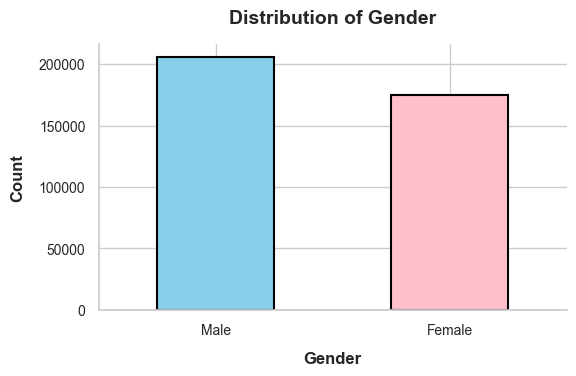

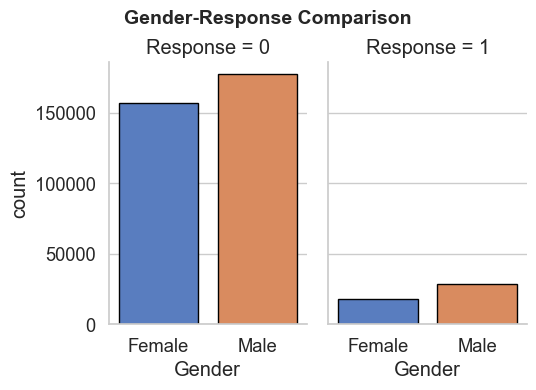

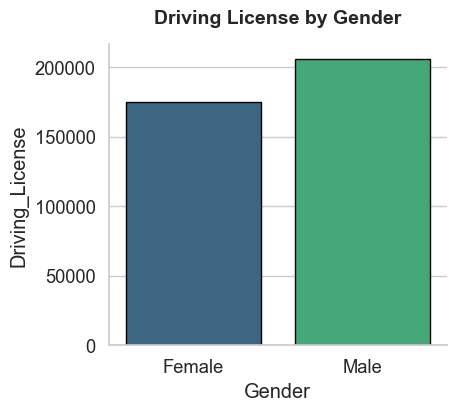

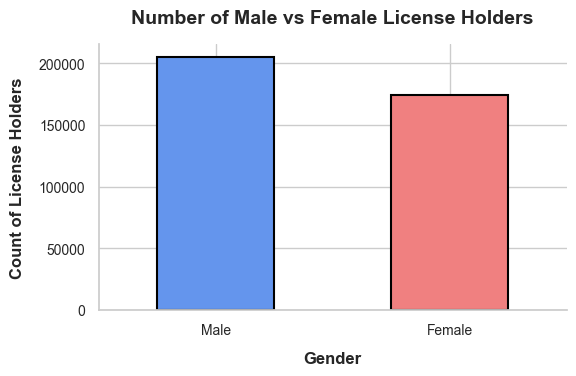

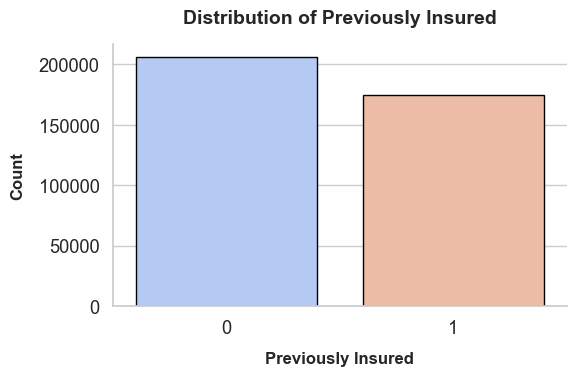

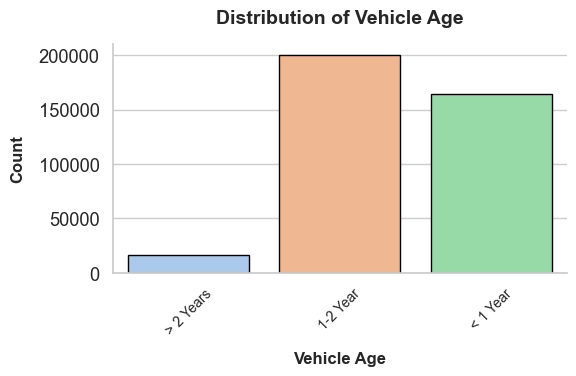

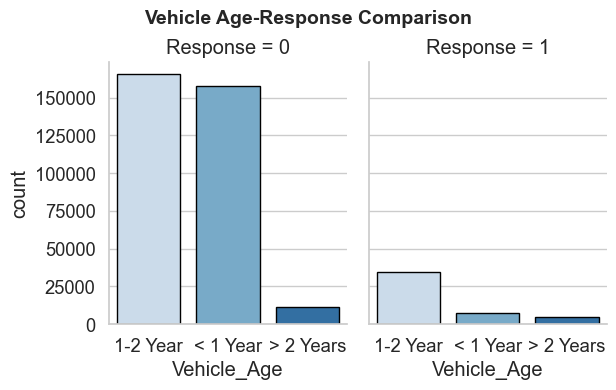

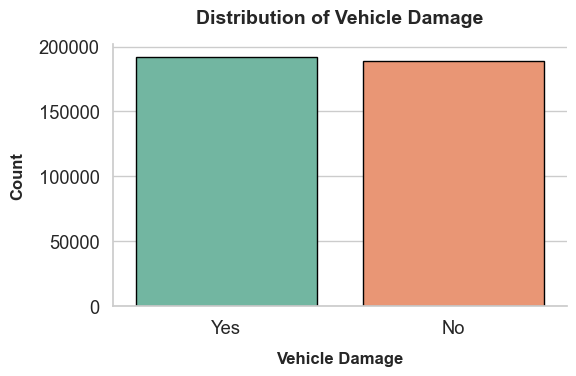

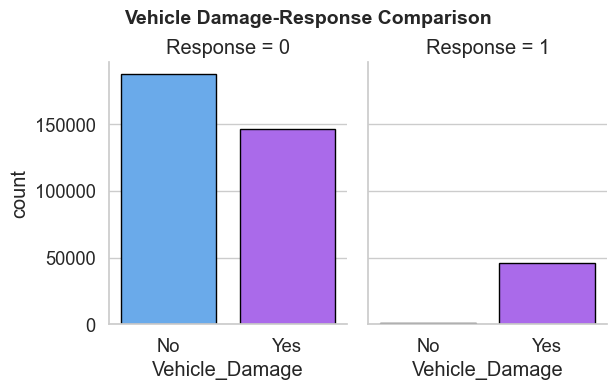

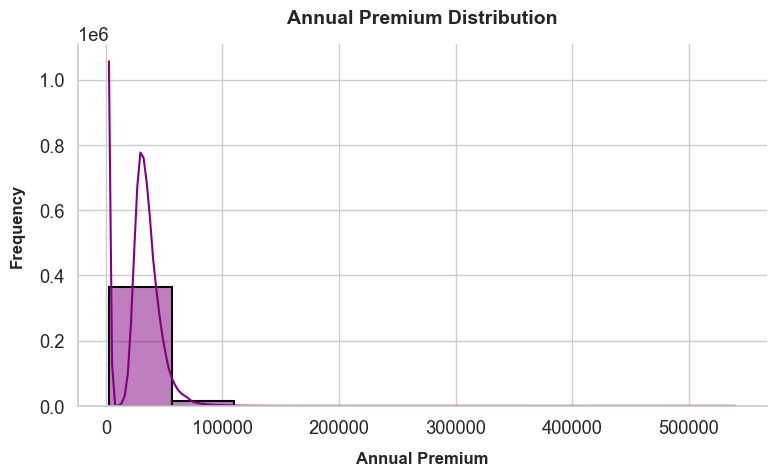

In [16]:
# Set Seaborn style for aesthetics
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# 1. Gender Distribution
plt.figure(figsize=(6, 4))
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', color=['skyblue', 'pink'], edgecolor='black', linewidth=1.5)
plt.title('Distribution of Gender', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Gender', fontsize=12, labelpad=10, fontweight='bold')
plt.ylabel('Count', fontsize=12, labelpad=10, fontweight='bold')
plt.xticks(fontsize=10, fontweight='medium', rotation=0)
plt.yticks(fontsize=10, fontweight='medium')
sns.despine()
plt.tight_layout()
plt.show()

# 2. Gender-Response Comparison
data = df.groupby(['Gender', 'Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()
sns.catplot(x="Gender", y="count", col="Response", data=data, kind="bar", height=4, aspect=0.7, palette="muted", edgecolor="black")
plt.subplots_adjust(top=0.85)
plt.suptitle('Gender-Response Comparison', fontsize=14, fontweight='bold')
plt.show()

# 3. Driving License by Gender
license_data = df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License", data=license_data, kind="bar", height=4, aspect=1.2, palette="viridis", edgecolor="black")
plt.title('Driving License by Gender', fontsize=14, fontweight='bold', pad=15)
plt.show()

# 4. Number of Male vs Female License Holders
license_holders = df[df['Driving_License'] == 1]
gender_counts = license_holders['Gender'].value_counts()
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['cornflowerblue', 'lightcoral'], edgecolor='black', linewidth=1.5)
plt.title('Number of Male vs Female License Holders', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Gender', fontsize=12, labelpad=10, fontweight='bold')
plt.ylabel('Count of License Holders', fontsize=12, labelpad=10, fontweight='bold')
plt.xticks(fontsize=10, fontweight='medium', rotation=0)
plt.yticks(fontsize=10, fontweight='medium')
sns.despine()
plt.tight_layout()
plt.show()

# 5. Previously Insured Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Previously_Insured", data=df, palette="coolwarm", edgecolor="black")
plt.title("Distribution of Previously Insured", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Previously Insured", fontsize=12, labelpad=10, fontweight='bold')
plt.ylabel("Count", fontsize=12, labelpad=10, fontweight='bold')
sns.despine()
plt.tight_layout()
plt.show()

# 6. Vehicle Age Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Vehicle_Age', data=df, palette="pastel", edgecolor="black")
plt.title('Distribution of Vehicle Age', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Vehicle Age', fontsize=12, labelpad=10, fontweight='bold')
plt.ylabel('Count', fontsize=12, labelpad=10, fontweight='bold')
plt.xticks(fontsize=10, fontweight='medium', rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

# 7. Vehicle Age-Response Comparison
data = df.groupby(['Vehicle_Age', 'Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()
sns.catplot(x="Vehicle_Age", y="count", col="Response", data=data, kind="bar", height=4, aspect=0.8, palette="Blues", edgecolor="black")
plt.subplots_adjust(top=0.85)
plt.suptitle('Vehicle Age-Response Comparison', fontsize=14, fontweight='bold')
plt.show()

# 8. Vehicle Damage Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Vehicle_Damage', palette="Set2", edgecolor="black")
plt.title('Distribution of Vehicle Damage', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Vehicle Damage', fontsize=12, labelpad=10, fontweight='bold')
plt.ylabel('Count', fontsize=12, labelpad=10, fontweight='bold')
sns.despine()
plt.tight_layout()
plt.show()

# 9. Vehicle Damage-Response Comparison
data = df.groupby(['Vehicle_Damage', 'Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()
sns.catplot(x="Vehicle_Damage", y="count", col="Response", data=data, kind="bar", height=4, aspect=0.8, palette="cool", edgecolor="black")
plt.subplots_adjust(top=0.85)
plt.suptitle('Vehicle Damage-Response Comparison', fontsize=14, fontweight='bold')
plt.show()

# 10. Annual Premium Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Annual_Premium'], bins=10, kde=True, color="purple", edgecolor="black", linewidth=1.5)
plt.title('Annual Premium Distribution', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Annual Premium', fontsize=12, labelpad=10, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, labelpad=10, fontweight='bold')
sns.despine()
plt.tight_layout()
plt.show()


In [17]:
# Response vs Vehicle_Age

data=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


In [18]:
df[df['Annual_Premium']>200000]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1412,1413,Female,41,1,28.0,0,1-2 Year,Yes,267698.0,124.0,63,1
11319,11320,Female,50,1,46.0,1,1-2 Year,No,508073.0,26.0,192,0
13426,13427,Female,47,1,28.0,0,1-2 Year,Yes,301762.0,124.0,22,0
15024,15025,Female,32,1,28.0,0,1-2 Year,Yes,315565.0,155.0,150,0
25532,25533,Male,50,1,28.0,0,1-2 Year,Yes,229935.0,122.0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...
368263,368264,Female,25,1,28.0,1,< 1 Year,Yes,346982.0,124.0,74,0
371910,371911,Female,23,1,37.0,1,< 1 Year,No,235683.0,152.0,246,0
372492,372493,Male,46,1,18.0,0,1-2 Year,No,220581.0,26.0,210,0
373415,373416,Male,56,1,28.0,0,1-2 Year,No,337573.0,26.0,239,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [20]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [21]:
# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [22]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Vehicle_Age >> object
Vehicle_Damage >> object
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64


In [23]:
# creating dummy cols for categorical features

df=pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [24]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64
Vehicle_Age_< 1 Year >> bool
Vehicle_Age_> 2 Years >> bool
Vehicle_Damage_Yes >> bool


In [25]:
# cols renaming and keeping dtype as int

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for column in cat_feat:
    df[column] = df[column].astype('str')

In [26]:
# scaling the data

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])


mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

# also, dropping id col now
id=df.id
df=df.drop('id',axis=1)

In [27]:
# train-test split

from sklearn.model_selection import train_test_split

train_target=df['Response']
train=df.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [28]:
train_target

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [29]:
train.head(1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,0,1,1


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [33]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grids for each model
param_grids = {
    "GradientBoosting": {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "LogisticRegression": {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Initialize models
models = {
    "GradientBoosting": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier()
}

# Store results
results = {}

# Perform RandomizedSearchCV and calculate classification reports
for model_name, model in models.items():
    print(f"Training {model_name}...")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=10,
        cv=4,
        verbose=1,
        random_state=101,
        n_jobs=-1
    )
    random_search.fit(x_train, y_train)
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(x_test)
    
    # Store classification report
    results[model_name] = classification_report(y_test, y_pred, output_dict=True)

# Display classification reports in elegant form

for model_name, report in results.items():
    print(f"\nClassification Report for {model_name}:\n")
    df_report = pd.DataFrame(report).transpose()
    print(df_report.round(2).to_string())


Training GradientBoosting...
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Training LogisticRegression...
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Training KNN...
Fitting 4 folds for each of 10 candidates, totalling 40 fits

Classification Report for GradientBoosting:

              precision  recall  f1-score   support
0                  0.88    1.00      0.93  83603.00
1                  0.53    0.01      0.01  11675.00
accuracy           0.88    0.88      0.88      0.88
macro avg          0.70    0.50      0.47  95278.00
weighted avg       0.84    0.88      0.82  95278.00

Classification Report for LogisticRegression:

              precision  recall  f1-score   support
0                  0.88    1.00      0.93  83603.00
1                  0.17    0.00      0.00  11675.00
accuracy           0.88    0.88      0.88      0.88
macro avg          0.52    0.50      0.47  95278.00
weighted avg       0.79    0.88      0.82  95278.00

Classification Report 